# **APPLE STOCK PREDICTION USING NEURAL NETWORK** 

---

* LSTM (Long Short Term Memory)
* BiLSTM (Bidirectional Long Short Term Memory)



In this project we are going to investigate close price of the stock over time.

Thus, We attempt to predict future stock behavior
(Predicting the stock closing price of APPLE dataset from nasdaq using LSTM)

# APPLE dataset

## reading dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
root='/gdrive/MyDrive/'

Mounted at /gdrive


**importing libraries**

In [ ]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Bidirectional

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.optimizers.schedules import ExponentialDecay

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense,LSTM,SimpleRNN,Dropout
from keras.callbacks import History


import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from subprocess import check_output
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM


import time #helper libraries
from sklearn.preprocessing import MinMaxScaler

from numpy import newaxis

import time

# For time stamps
from datetime import datetime


In [ ]:
pd.set_option('display.max_columns',None)  #to show all columns
data = pd.read_csv(root+'HistoricalData_1656020285091.csv',  parse_dates=True, index_col='Date', squeeze=True) #reading dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2022-06-22 to 2012-06-25
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Close/Last  2515 non-null   object
 1   Volume      2515 non-null   int64 
 2   Open        2515 non-null   object
 3   High        2515 non-null   object
 4   Low         2515 non-null   object
dtypes: int64(1), object(4)
memory usage: 117.9+ KB


In [ ]:
data.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2022-06-22,$135.35,73409230,$134.79,$137.76,$133.91
2022-06-21,$135.87,81000490,$133.42,$137.06,$133.32
2022-06-17,$131.56,134520300,$130.065,$133.079,$129.81
2022-06-16,$130.06,107961500,$132.08,$132.39,$129.04
2022-06-15,$135.43,91532970,$134.29,$137.34,$132.16


In [ ]:
cols=['Close/Last','Open', 'High', 'Low']

for c in cols:
  #convert strings to numbers in dataset
  data[c] = data[c].str.replace('$','').astype(float)  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


With regard to datasets, we have to convert strings to numbers in order to make data ready for use in calculations:

In [ ]:
data.rename(columns={'Close/Last': 'Close'}, inplace=True)
data2 = data.copy()
APPLE=data.copy()

In [ ]:
APPLE.describe()

,Close,Volume,Open,High,Low
count,2515.000000,2.515000e+03,2515.000000,2515.000000,2515.000000
mean,55.707656,1.925358e+08,55.680871,56.290453,55.083896
std,44.822792,1.493591e+08,44.798605,45.373079,44.232292
min,13.947500,4.099995e+07,13.856100,14.271400,13.753600
25%,24.756250,9.765941e+07,24.721250,25.026250,24.572500
50%,37.512500,1.392250e+08,37.390000,37.817500,37.130000
75%,66.256250,2.318773e+08,65.937500,66.816250,65.416250
max,182.010000,1.457835e+09,182.630000,182.940000,179.120000


In [ ]:
APPLE.head()

,Close,Volume,Open,High,Low
Date,,,,,
2022-06-22,135.35,73409230,134.790,137.760,133.91
2022-06-21,135.87,81000490,133.420,137.060,133.32
2022-06-17,131.56,134520300,130.065,133.079,129.81
2022-06-16,130.06,107961500,132.080,132.390,129.04
2022-06-15,135.43,91532970,134.290,137.340,132.16


# visualizing stock prices history

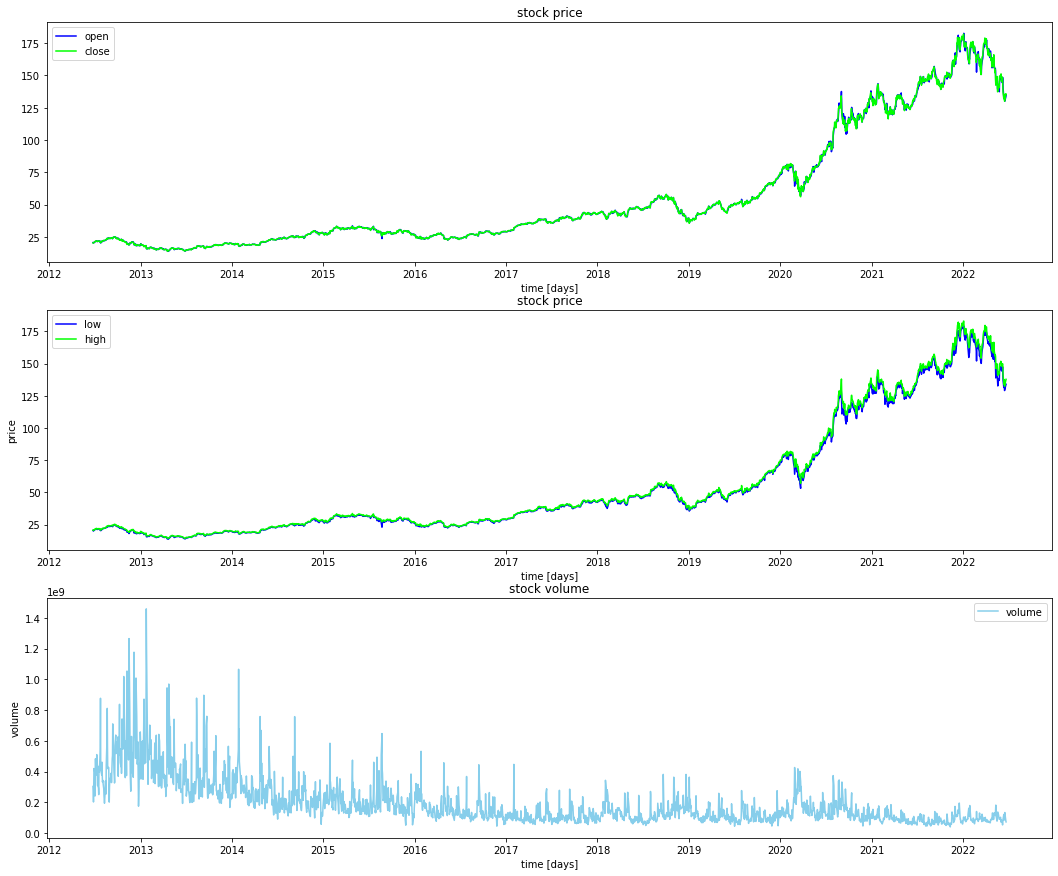

In [ ]:
plt.figure(figsize=(18,15));
plt.subplot(3,1,1)
plt.plot(APPLE['Open'], label='open')
plt.plot(APPLE['Close'], label='close')
#plt.gca().invert_xaxis()
plt.title('stock price')
plt.xlabel('time [days]')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(APPLE['Low'], color='blue', label='low')
plt.plot(APPLE['High'], color='lime', label='high')
#plt.gca().invert_xaxis()
plt.title('stock price')
plt.xlabel('time [days]')
plt.ylabel('price')
plt.legend(loc='best')
#plt.show()

plt.subplot(3,1,3)
plt.plot(APPLE['Volume'], color='skyblue', label='volume')
#plt.gca().invert_xaxis()
plt.title('stock volume')
plt.xlabel('time [days]')
plt.ylabel('volume')
plt.legend(loc='best');

The apple data shows an upward trend over the last 5 years.
this could be one of the potential assets worth our investment consideration.

In [ ]:
n1Row, n1Col = APPLE.shape
print(f'There are {n1Row} rows and {n1Col} columns in apple Historical Quotes dataset')

There are 2515 rows and 5 columns in apple Historical Quotes dataset


In [ ]:
APPLE.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2515 entries, 2022-06-22 to 2012-06-25
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2515 non-null   float64
 1   Volume  2515 non-null   int64  
 2   Open    2515 non-null   float64
 3   High    2515 non-null   float64
 4   Low     2515 non-null   float64
dtypes: float64(4), int64(1)
memory usage: 117.9 KB


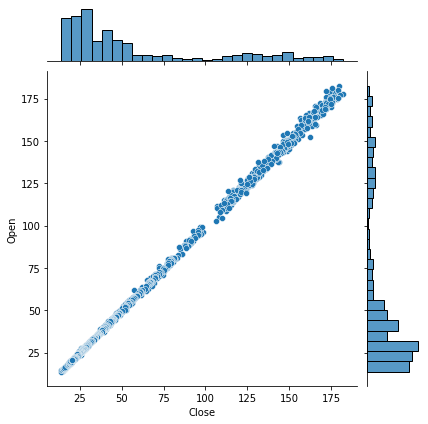

In [ ]:
import seaborn as sns
sns.jointplot(x=APPLE['Close'], y=APPLE['Open'])

## The total volume of stock which traded each day

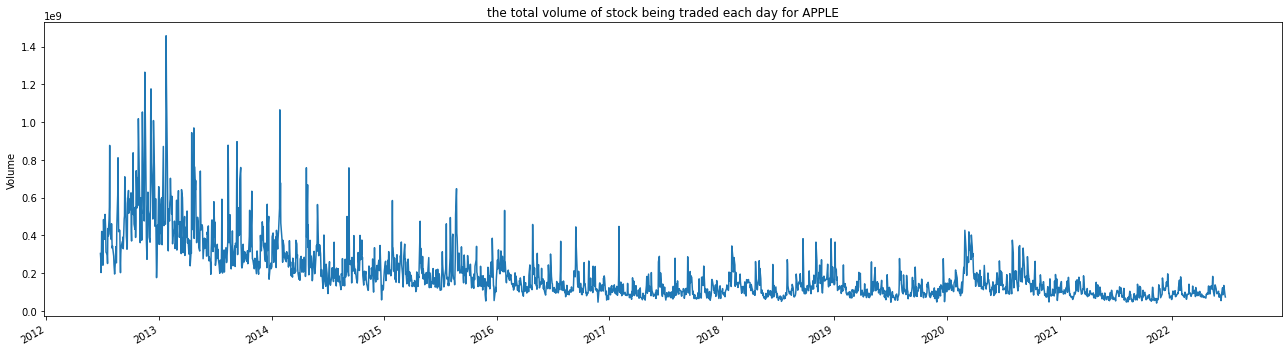

In [ ]:
plt.figure(figsize=(18,5))
APPLE['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
#plt.gca().invert_xaxis()
plt.title(f"the total volume of stock being traded each day for APPLE")
plt.rcParams["figure.figsize"] = (14,5)

plt.tight_layout()

# Moving averages

In [ ]:
ma_day = [10, 20, 50] #the most common moving averages

for ma in ma_day:
    column_name = f"MA for {ma} days"
    APPLE[column_name] = APPLE['Open'].rolling(ma).mean()

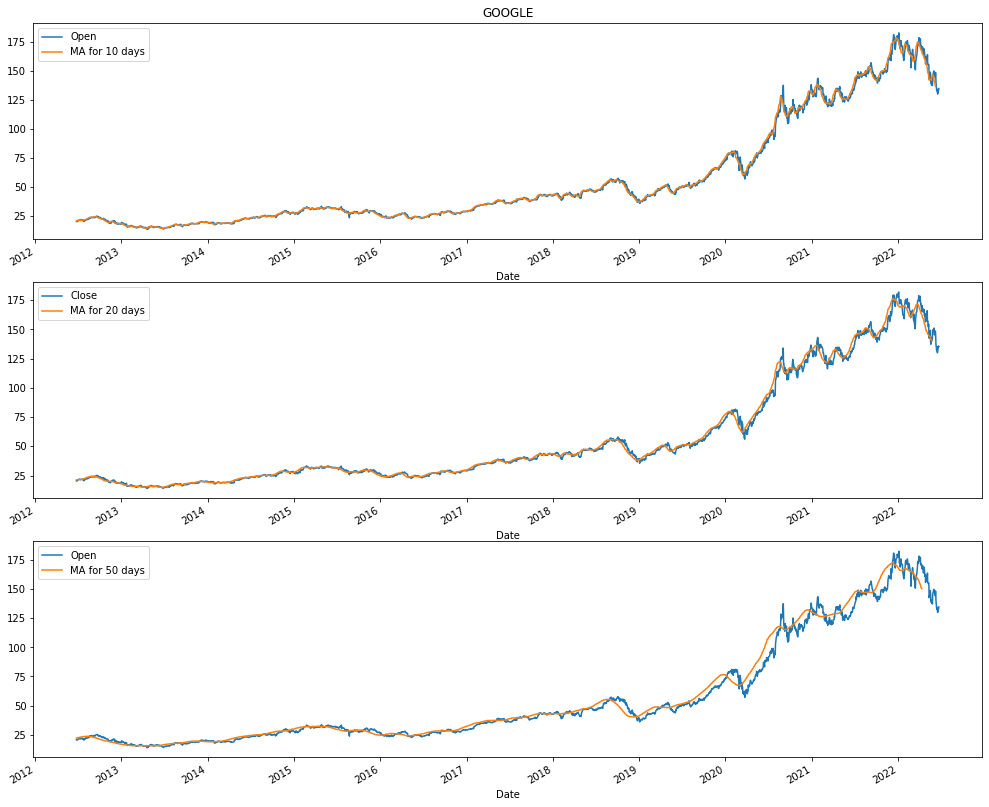

<Figure size 1224x360 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1)
fig.set_figheight(15)
fig.set_figwidth(17)

plt.figure(figsize=(17, 5))

plt.subplots_adjust(top=1.25, bottom=1.2)

APPLE[['Open', 'MA for 10 days']].plot(ax=axes[0])
axes[0].set_title('GOOGLE')
APPLE[['Close','MA for 20 days']].plot(ax=axes[1])
APPLE[['Open','MA for 50 days']].plot(ax=axes[2])

Text(0.5, 1.0, 'APPLE')

<Figure size 1296x432 with 0 Axes>

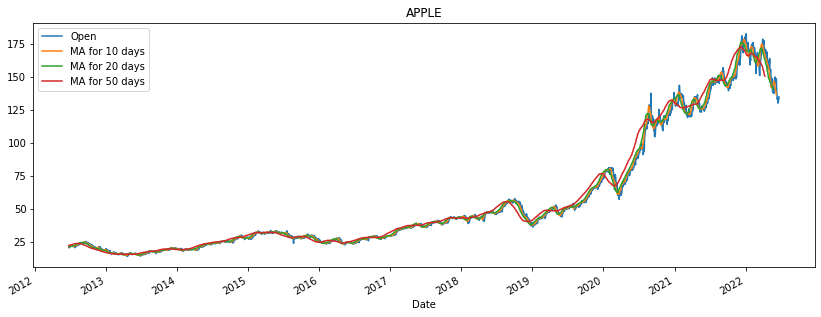

In [ ]:
plt.figure(figsize=(18,6));

p1=APPLE[['Open', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot()
plt.title('APPLE')

# FITTING APPLE DATASET TO MODEL

* To build a LSTM model,we need to seperate our stock data into a training set and a test set.
* A special data structure is needed to cover 60-time stamps, based on which RNN will predict the 61st price. Here the number of past timestamps is set to 60 based on experimentation. Thus, x_train is a nested list, which contains lists of 60 time-stamp prices

* Normalization is a very important part for any Recurrent Neural Network. For our LSTM model, normalization will play an important role. Normalization using MinMaxScaler will bring our entire datapoints between a minimum and a maximum value. For this purpose, we will use the values (0,1).
* now we choose a specific stock feature: Close ,normalize stock data ,then create train, validation and test data sets

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

## preparing training set:

extract close values from stock data and convert it to a number series and calculate the size for 90% of dataset.(math ceil used to ensure the size is integer):

In [ ]:
close_prices= data.filter(['Close']) #creates a dataframe just with specified column( close )
values = close_prices.values
training_data_len = math.ceil(len(values) * 0.9)

normalizing data and set apart 90% of data as the training set:

In [ ]:
scaled_data=scaler.fit_transform(values.reshape(-1,1))
train_data = scaled_data[0: training_data_len,:]

we set a window_size = 60 .then create a 60-day window of historical values(i- 60) as our feature data (x_train), and the following 60-day window as label data (y_train).

In [ ]:
window_size = 60
x_train=[]
y_train=[]
for i in range(window_size,len(train_data)):
  x_train.append(train_data[i-window_size:i,0])
  y_train.append(train_data[i,0])

In [ ]:
x_train,y_train=np.array(x_train),np.array(y_train)

Reshape data:
* we only have one indicator or feature (Close price). But we can add more indicators following the same data processing methods.
* newshape is in (batch size, number of timestamps, number of indicators). (batch size, number of timestamps) is the shape of x_train. Here we only have 1 indicator.

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

## preparing test set:
extract 'Close' values from normalized dataset(the last 10% of dataset).
similar to training set, we will have to create feature data(x_test) and label data (y_test) from our test set:

In [ ]:
test_data = scaled_data[training_data_len - window_size: , :]
x_test=[]
y_test= values[training_data_len:]
for j in range(window_size,len(test_data)):
  x_test.append(test_data[j-window_size:j,0])

x_test=np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [ ]:
print('x_train.shape = ',x_train.shape)
print('y_train.shape = ', y_train.shape)
print('x_test.shape = ', x_test.shape)
print('y_test.shape = ',y_test.shape)

x_train.shape =  (2204, 60, 1)
y_train.shape =  (2204,)
x_test.shape =  (251, 60, 1)
y_test.shape =  (251, 1)


# LSTM MODEL NO.1

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(100, return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(64 , return_sequences=True,activation='tanh'))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(1,activation='linear'))
model.summary()

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 64)            42240     
                                                                 
 dropout_1 (Dropout)         (None, 60, 64)            0         
                                                                 
 lstm_2 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 95,489
Trainable params: 95,489
Non-traina

1. we defined a sequential model which consists of a linear stack of layers.
2. adding each dropout layer to prevent overfitting. when defining drop out layers we specify 0.2,meaning that 20% of the layers will be dropped.
3. add a LSTM layer by 100 network units.setting return_sequence = true means the output of the layer will be another sequence of the same lenght.
4.  return_sequences is True as we need to add another LSTM layer after the current one. 
5. add another LSTM layer with 100 units and return_sequence = false means that this time just the last output returns in the output unit.so, the last LSTM layer, return_sequences is False as we will not add more LSTM layers.
6. adding a densly connected layer that specifies the output of 1 network unit.The output dimension is 1 since we are predicting 1 price each time.

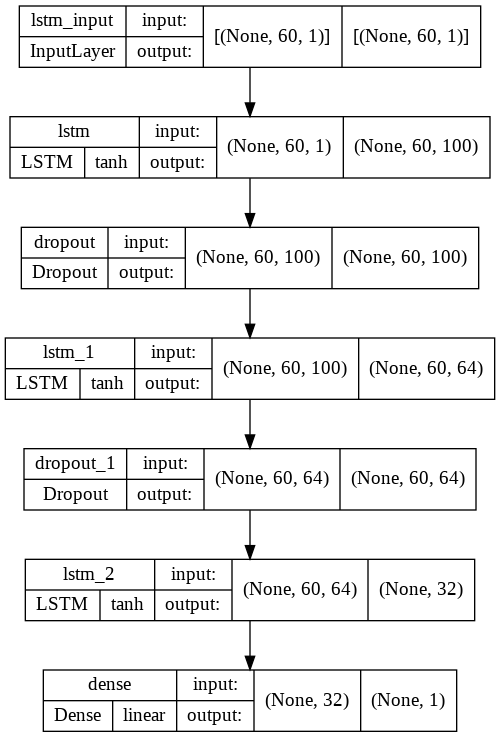

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

## Training the model
We now train our model with the training data over 50 epochs and with a batch size = 32 and we set the optimizer to be Adam and the mean squared error to be loss function:

In [ ]:
# Train the model
history = model.fit(x_train, y_train,epochs=50, batch_size=32 , validation_split=0.25,  verbose=1 , shuffle=True)

Epoch 1/50
52/52 [==============================] - 22s 266ms/step - loss: 0.0124 - accuracy: 6.0496e-04 - val_loss: 3.0913e-04 - val_accuracy: 0.0000e+00
Epoch 2/50
52/52 [==============================] - 13s 251ms/step - loss: 8.6121e-04 - accuracy: 6.0496e-04 - val_loss: 3.9565e-05 - val_accuracy: 0.0000e+00
Epoch 3/50
52/52 [==============================] - 14s 266ms/step - loss: 7.7059e-04 - accuracy: 6.0496e-04 - val_loss: 4.5749e-05 - val_accuracy: 0.0000e+00
Epoch 4/50
52/52 [==============================] - 28s 540ms/step - loss: 8.7788e-04 - accuracy: 6.0496e-04 - val_loss: 4.1755e-05 - val_accuracy: 0.0000e+00
Epoch 5/50
52/52 [==============================] - 24s 463ms/step - loss: 7.7042e-04 - accuracy: 6.0496e-04 - val_loss: 4.0196e-05 - val_accuracy: 0.0000e+00
Epoch 6/50
52/52 [==============================] - 13s 252ms/step - loss: 7.6292e-04 - accuracy: 6.0496e-04 - val_loss: 4.6083e-05 - val_accuracy: 0.0000e+00
Epoch 7/50
52/52 [==============================] 

## Model evaluation
we evaluate our model with test set and then apply mean squared error (MSE) and root mean squared error(RMSE) and r_squared metrics to examine the performance of the model.

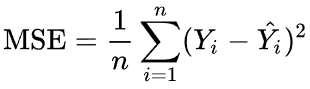

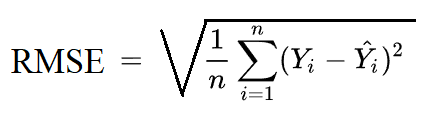

MSE is beneficial when the spread of prediction values is significant and larger values must be punished.

When the spread is important and bigger values need to be penalized, RMSE (NRMSE) is also useful. When compared to MSE, RMSE is easier to interpret because the RMSE number is on the same scale as the projected values.

# R-Squared 
The stationary R-squared is used in time series forecasting as a measure that compares the stationary part of the model to a simple mean model. ​​It is defined as, 

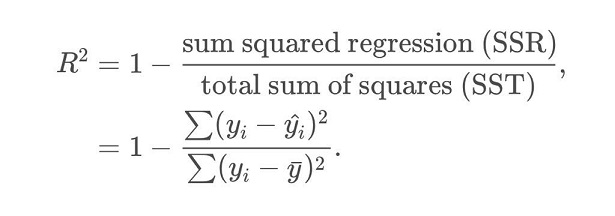


When the relation between the forecasted and actual value is to be known then R2 is used. 

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
mse = np.mean(predictions - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  1.1292269819160854
MSE :  1.275153576687311
R2 :  0.8409089295587304


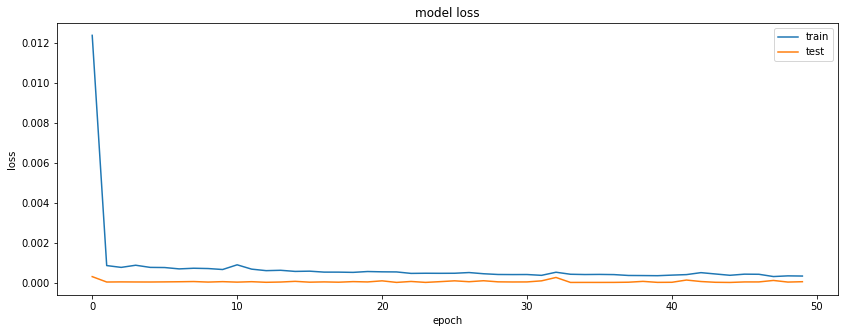

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


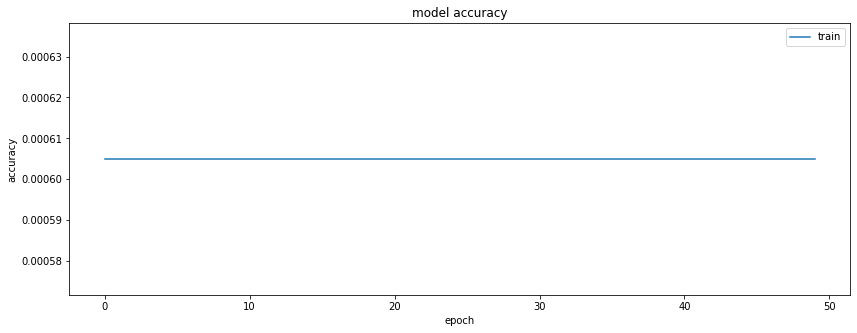

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(10,5)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
print('accuracy =',history.history['accuracy'][-1])

accuracy = 0.0006049606599844992


## Visualizing predicted closing prices

In [ ]:
training_data_len

2264

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


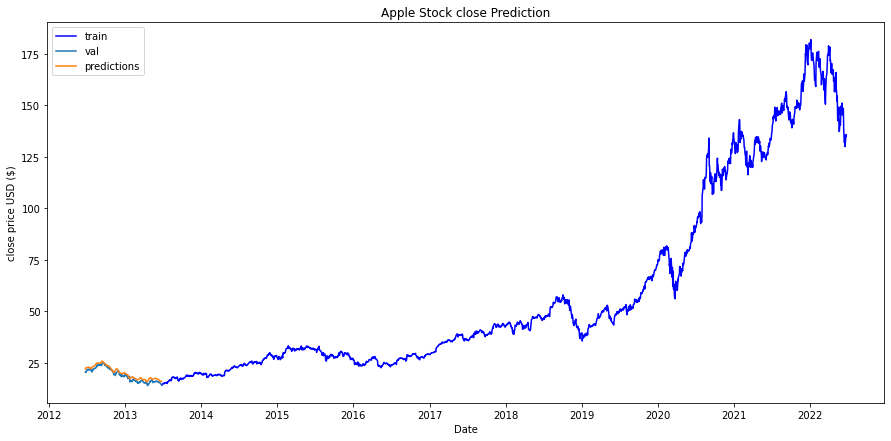

In [ ]:
# Predict the stock closing price

data1 = data.filter(['Close'])
train= data1[:training_data_len]
validation = data1[training_data_len:]
validation['predictions'] = predictions

plt.figure(figsize=(15, 7))
plt.title('Apple Stock close Prediction')
plt.xlabel('Date')
plt.ylabel('close price USD ($)')
plt.plot(train, color='blue')
plt.plot(validation[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='upper left')
plt.show()

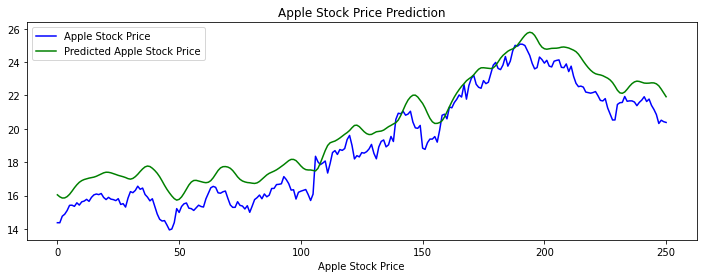

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Apple Stock Price')
plt.plot(predictions, color='green', label='Predicted Apple Stock Price')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.xlabel('Apple Stock Price')
plt.legend()
plt.show()

# LSTM MODEL NO.2

In [ ]:
# Building Model:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1], 1)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(units=50, return_sequences=True))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.LSTM(units=50))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units=1))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_7 (LSTM)               (None, 60, 50)            10400     
                                                                 
 dropout_6 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_9 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_8 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 50)               

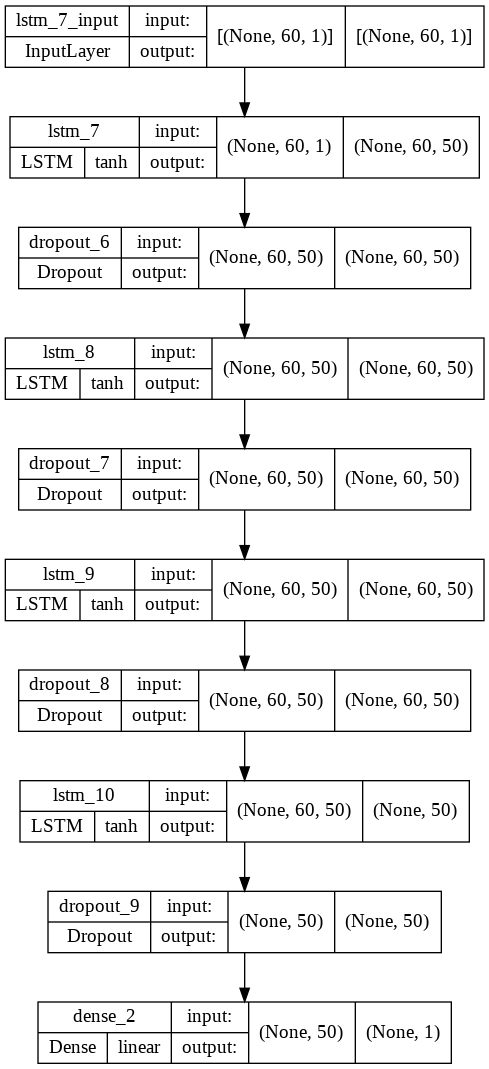

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

In [ ]:
start = time.time()
model.compile(loss='mse',  optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.023040771484375


Keras's fit() does not return the model but it returns a History object that contain per-epoch loss and metrics.

In [ ]:
history =model.fit(x_train, y_train, epochs=100,batch_size=32,validation_split=0.25, verbose=1 , shuffle=True)

Epoch 1/100
52/52 [==============================] - 17s 181ms/step - loss: 0.0247 - accuracy: 6.0496e-04 - val_loss: 1.3622e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
52/52 [==============================] - 7s 137ms/step - loss: 0.0083 - accuracy: 6.0496e-04 - val_loss: 6.9523e-05 - val_accuracy: 0.0000e+00
Epoch 3/100
52/52 [==============================] - 7s 136ms/step - loss: 0.0074 - accuracy: 6.0496e-04 - val_loss: 1.6250e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
52/52 [==============================] - 7s 136ms/step - loss: 0.0060 - accuracy: 6.0496e-04 - val_loss: 9.6192e-05 - val_accuracy: 0.0000e+00
Epoch 5/100
52/52 [==============================] - 7s 137ms/step - loss: 0.0060 - accuracy: 6.0496e-04 - val_loss: 7.9531e-05 - val_accuracy: 0.0000e+00
Epoch 6/100
52/52 [==============================] - 7s 135ms/step - loss: 0.0056 - accuracy: 6.0496e-04 - val_loss: 1.8750e-04 - val_accuracy: 0.0000e+00
Epoch 7/100
52/52 [==============================] - 7s 139ms/step - 

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
mse = np.mean(predictions - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  3.120903760823406
MSE :  9.740040284321678
R2 :  0.0006180498835880455


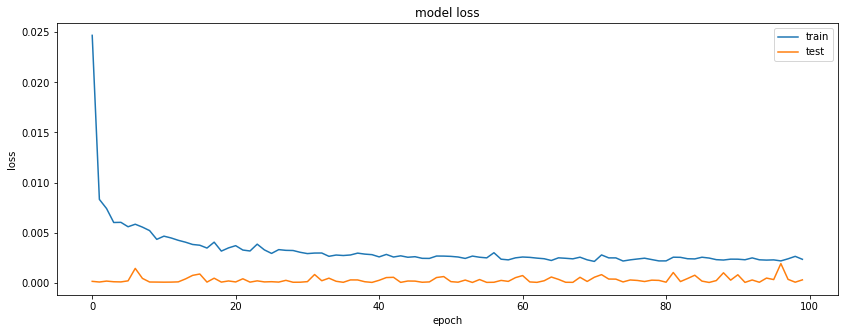

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


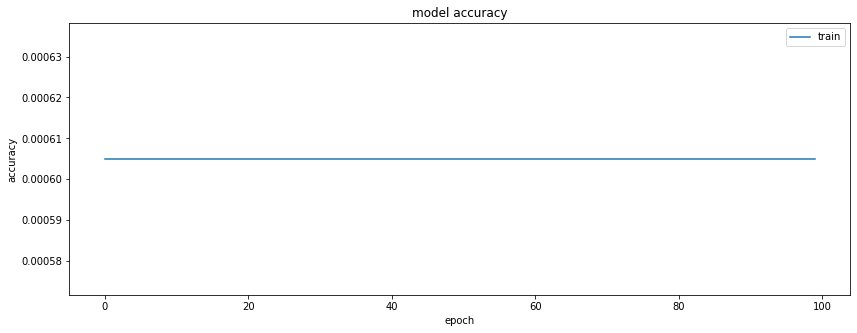

In [ ]:
# Visualize training history
from keras.models import Sequential
from keras.layers import Dense

# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(10,5)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
print('accuracy =',history.history['accuracy'][0])

accuracy = 0.0006049606599844992


## Visualizing predicted close prices

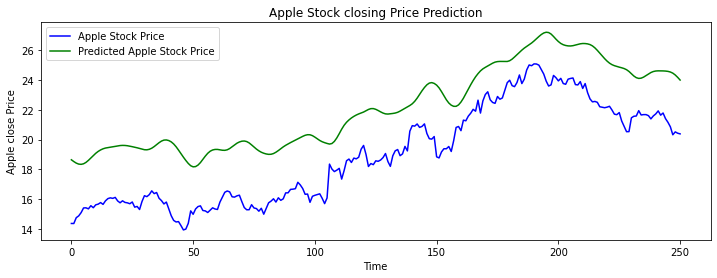

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Apple Stock Price')
plt.plot(predictions, color='green', label='Predicted Apple Stock Price')

plt.title('Apple Stock closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple close Price')
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


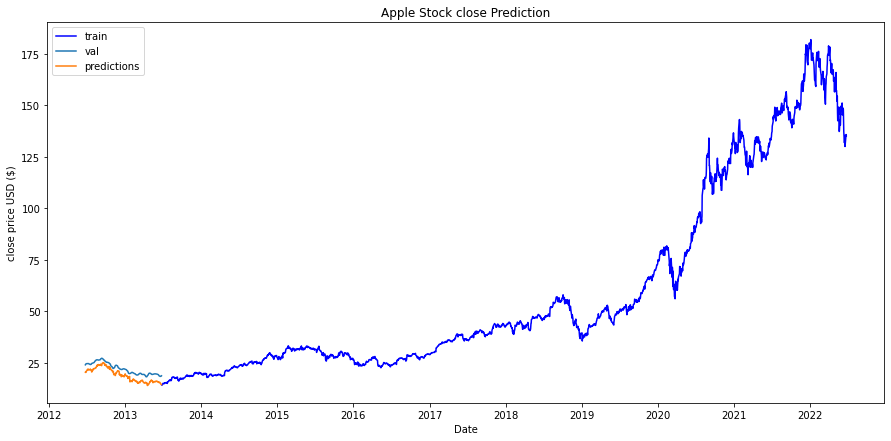

In [ ]:
# Predict the stock closing price

data1 = data2.filter(['Close'])
train= data1[:training_data_len]
validation = data1[training_data_len:]
validation['predictions'] = predictions

plt.figure(figsize=(15, 7))
plt.title('Apple Stock close Prediction')
plt.xlabel('Date')
plt.ylabel('close price USD ($)')
plt.plot(train, color='blue')
plt.plot(validation[['predictions','Close']])
plt.legend(['train','val','predictions'],loc='upper left')
plt.show()

# BI-LSTM MODEL

Build the bidirectional lstm model

In [ ]:
# define model
model = Sequential()
model.add(Bidirectional(LSTM(50, activation='tanh'), input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.build((x_train.shape[1],1)) 
model.add(Dense(1))

In [ ]:
start = time.time()
model.compile(loss='mse',  optimizer='adam', metrics=['accuracy'])
print ('compilation time : ', time.time() - start)

compilation time :  0.007456302642822266


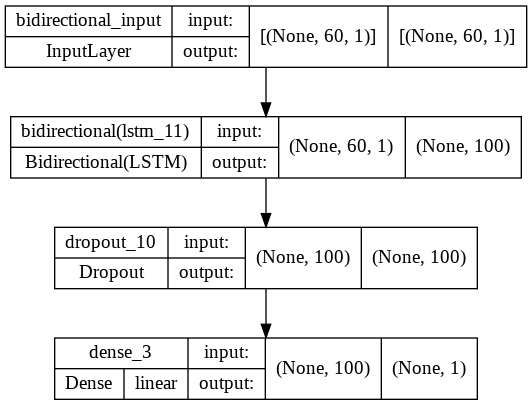

In [ ]:
dot_img_file = '/tmp/model_1.png'
tf.keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True,
                          show_dtype=False, show_layer_names=True,rankdir='TB',
                          expand_nested=False, dpi=96, layer_range=None,
                          show_layer_activations=True)

In [ ]:
history=model.fit(x_train, y_train, epochs=50, batch_size=32,validation_split=0.2,  verbose=1 , shuffle=True)

Epoch 1/50
56/56 [==============================] - 12s 126ms/step - loss: 0.0220 - accuracy: 5.6721e-04 - val_loss: 4.3853e-04 - val_accuracy: 0.0000e+00
Epoch 2/50
56/56 [==============================] - 7s 116ms/step - loss: 0.0022 - accuracy: 5.6721e-04 - val_loss: 3.0402e-04 - val_accuracy: 0.0000e+00
Epoch 3/50
56/56 [==============================] - 7s 117ms/step - loss: 0.0020 - accuracy: 5.6721e-04 - val_loss: 2.0666e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
56/56 [==============================] - 7s 119ms/step - loss: 0.0018 - accuracy: 5.6721e-04 - val_loss: 1.8312e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
56/56 [==============================] - 7s 116ms/step - loss: 0.0015 - accuracy: 5.6721e-04 - val_loss: 1.2023e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
56/56 [==============================] - 7s 116ms/step - loss: 0.0016 - accuracy: 5.6721e-04 - val_loss: 2.6010e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
56/56 [==============================] - 7s 117ms/step - loss: 0

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
mse = np.mean(predictions - y_test)**2
from sklearn.metrics import r2_score
R2 = r2_score(y_test, predictions, multioutput='variance_weighted')
print('RMSE : ',rmse)
print('MSE : ',mse)
print('R2 : ',R2)

RMSE :  0.39104942785012287
MSE :  0.15291965502190846
R2 :  0.9340726278285816


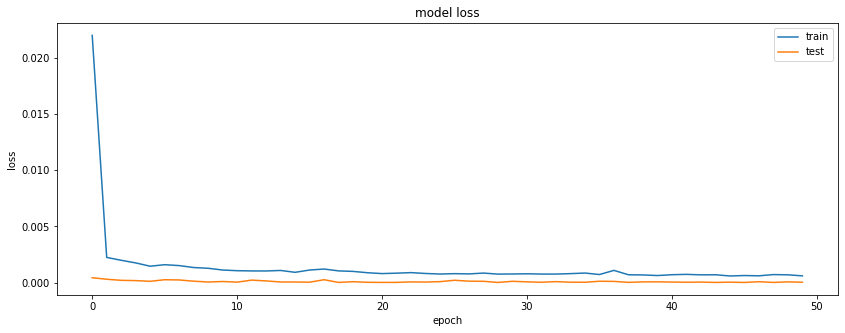

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


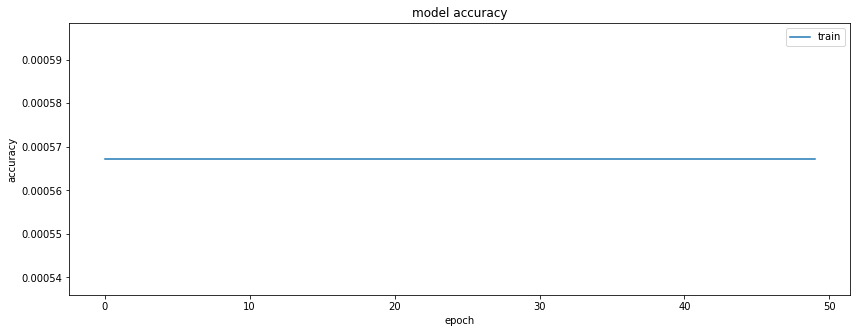

In [ ]:
# Visualize training history
# list all data in history
print(history.history.keys())

# summarize history for accuracy

plt.size=(10,5)
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

In [ ]:
print('accuracy =',history.history['accuracy'][-1])

accuracy = 0.0005672149709425867


## Visualizing predicted closing prices

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


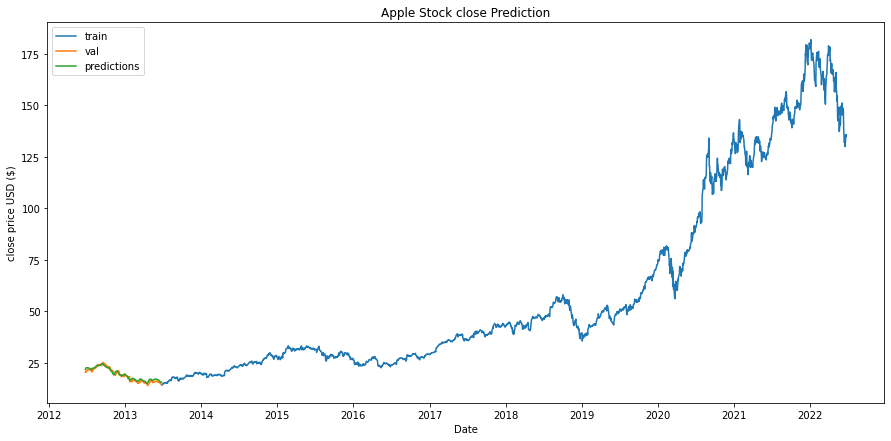

In [ ]:
# Predict the stock closing price

data1 = data.filter(['Close'])
train= data1[:training_data_len]
validation = data1[training_data_len:]
validation['predictions'] = predictions

plt.figure(figsize=(15, 7))
plt.title('Apple Stock close Prediction')
plt.xlabel('Date')
plt.ylabel('close price USD ($)')
plt.plot(train)
plt.plot(validation[['Close','predictions']])
plt.legend(['train','val','predictions'],loc='upper left')
plt.show()

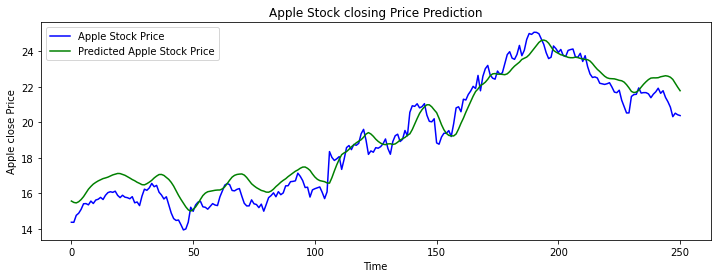

In [ ]:
# Predict the stock prices

plt.figure(figsize=(12, 4))

real_stock_price = y_test[:]
plt.plot(real_stock_price, color='blue', label='Apple Stock Price')
plt.plot(predictions, color='green', label='Predicted Apple Stock Price')

plt.title('Apple Stock closing Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple close Price')
plt.legend()
plt.show()